## Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)


Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:
...
где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

### Многочлен первой степени

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [4]:
%matplotlib inline
import numpy as np

In [5]:
x_list1 = [1, 15]
y_list1 = []

for i in x_list1:
    y = np.sin(i / 5) * np.exp(i / 10) + 5 * np.exp(-i / 2)
    y_list1.append(y)
    
print(*y_list1)

3.252216865271419 0.6352214195786656


In [6]:
M_1 = []
for i in x_list1:           # заполняем матрицу по строкам степенями икса
    b = []
    for j in range(2):
        a = i**j
        b.append(a)
    M_1.append(b)

w_1 = np.linalg.solve(M_1, y_list1)   # находим веса в линейном уравнении
w_1

array([ 3.43914511, -0.18692825])

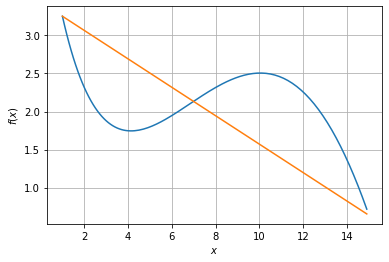

In [7]:
from matplotlib import pylab as plt

x = np.arange(1, 15, 0.1)                                 #Массив значений аргумента
y = np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)   # Изначальная функция 

x_1 = np.arange(1, 15, 0.1) 
y_1 = w_1[0] +w_1[1]*x_1                                 # Приближение функции многочленом первой степени

plt.plot(x, y, x_1, y_1) #Построение графика
plt.xlabel(r'$x$') #Метка по оси x в формате TeX
plt.ylabel(r'$f(x)$') #Метка по оси y в формате TeX
plt.grid(True) #Сетка
plt.show() #Показать график


### Многочлен второй степени

2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

In [8]:
x_list2 = [1, 8, 15]
y_list2 = []

for i in x_list2:
    y = np.sin(i / 5) * np.exp(i / 10) + 5 * np.exp(-i / 2)
    y_list2.append(y)
    
print(*y_list2)

3.252216865271419 2.316170159053224 0.6352214195786656


In [9]:
M_2 = []
for i in x_list2:           # заполняем матрицу по строкам степенями икса
    b = []
    for j in range(3):
        a = i**j
        b.append(a)
    M_2.append(b)

w_2 = np.linalg.solve(M_2, y_list2)  # находим веса в квадратном уравнении
w_2

array([ 3.32512949, -0.06531159, -0.00760104])

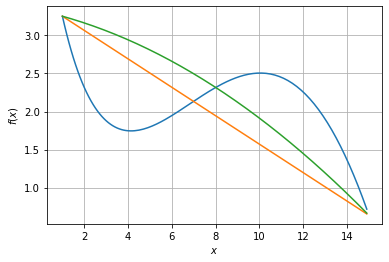

In [10]:
x = np.arange(1, 15, 0.1)                                 #Массив значений аргумента
y = np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)   # Изначальная функция 

x_1 = np.arange(1, 15, 0.1) 
y_1 = w_1[0] +w_1[1]*x_1                                # Приближение функции многочленом первой степени

x_2 = np.arange(1, 15, 0.1) 
y_2 = w_2[0] + w_2[1]*x_2 + w_2[2]*x_2**2               # Приближение функции многочленом второй степени 

plt.plot(x, y, x_1, y_1, x_2, y_2) #Построение графика
plt.xlabel(r'$x$') #Метка по оси x в формате TeX
plt.ylabel(r'$f(x)$') #Метка по оси y в формате TeX
plt.grid(True) #Сетка
plt.show() #Показать график

### Многочлен третьей степени

3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

In [11]:
x_list3 = [1, 4, 10, 15]
y_list3 = []

for i in x_list3:
    y = np.sin(i / 5) * np.exp(i / 10) + 5 * np.exp(-i / 2)
    y_list3.append(y)
    
print(*y_list3)

3.252216865271419 1.7468459495903677 2.5054164070002463 0.6352214195786656


In [12]:
M_3 = []
for i in x_list3:           # заполняем матрицу по строкам степенями икса
    b = []
    for j in range(4):
        a = i**j
        b.append(a)
    M_3.append(b)

w_3 = np.linalg.solve(M_3, y_list3)  # находим веса в уравнении третьей степени
w_3

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

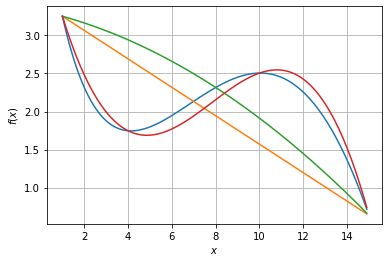

In [13]:
x = np.arange(1, 15, 0.1)                                 #Массив значений аргумента
y = np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)   # Изначальная функция 

x_1 = np.arange(1, 15, 0.1) 
y_1 = w_1[0] +w_1[1]*x_1                                # Приближение функции многочленом первой степени

x_2 = np.arange(1, 15, 0.1) 
y_2 = w_2[0] + w_2[1]*x_2 + w_2[2]*x_2**2               # Приближение функции многочленом второй степени 

x_3 = np.arange(1, 15, 0.1) 
y_3 = w_3[0] + w_3[1]*x_3 + w_3[2]*x_3**2 + w_3[3]*x_3**3

plt.plot(x, y, x_1, y_1, x_2, y_2, x_3, y_3) #Построение графика
plt.xlabel(r'$x$') #Метка по оси x в формате TeX
plt.ylabel(r'$f(x)$') #Метка по оси y в формате TeX
plt.grid(True) #Сетка
plt.show() #Показать график